In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import LeaveOneOut,cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.kernel_approximation import PolynomialCountSketch
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.decomposition import PCA
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [421]:
#generate and filter the data
data = pd.read_csv('new_data.csv')
data['Sex'] = data['Sex'].replace('M',1)
data['Sex'] = data['Sex'].replace('F',(0))
data['Side'] = data['Side'].replace('L',(0))
data['Side'] = data['Side'].replace('R',1)
X = data[['Age','Sex','BMI','GX AT VO2 (mL/kg/min)','GX AT VE/VCO2','GX VO2 Max VO2 (mL/kg/min)','GX VO2 Max VO2/Pred (%)','GX VO2 Max VO2/HR (mL/beat)','GX Predicted VO2/HR (mL/beat)','GX Work Max Work (Watts)','GX Predicted Work (Watts)','PF Pre FEV1/FVC (%)','PF Pre FEV1 (L)','Side','pred mort','LOS','LOSbin']]
X = X.dropna(axis=0)

In [422]:
X2 = X[['Age','Sex','BMI','GX AT VO2 (mL/kg/min)','GX AT VE/VCO2','GX VO2 Max VO2 (mL/kg/min)','GX VO2 Max VO2/Pred (%)','GX VO2 Max VO2/HR (mL/beat)','GX Predicted VO2/HR (mL/beat)','GX Work Max Work (Watts)','GX Predicted Work (Watts)','PF Pre FEV1/FVC (%)','PF Pre FEV1 (L)','Side','pred mort','LOS','LOSbin']]
X2=X2.rename(columns= {"GX VO2 Max VO2 (mL/kg/min)":'G2',"GX AT VO2 (mL/kg/min)" : "G0", "GX AT VE/VCO2" : "G1",
                        'GX VO2 Max VO2/Pred (%)' : 'G3','GX VO2 Max VO2/HR (mL/beat)':'G4','GX Predicted VO2/HR (mL/beat)':'G5','GX Work Max Work (Watts)':'G6','GX Predicted Work (Watts)':'G7','PF Pre FEV1/FVC (%)':'G8','PF Pre FEV1 (L)':'G9', 'pred mort' : 'predmort'})
X2 = X2.drop(X2[(X2['G8'] == 0.0)|(X2['G9'] == 0.0)].index)

In [423]:
data = X2[['Age','Sex','BMI','G0','G1','G2','G3','G4','G5','G6','G7','G8','G9','Side','predmort','LOS']]

In [424]:
data

,Age,Sex,BMI,G0,G1,G2,G3,G4,G5,G6,G7,G8,G9,Side,predmort,LOS
0,66.0,1.0,26.0,7.4,39.0,9.8,31.0,8.0,15.0,30.0,175.0,57.0,1.56,0.0,1.42,1.0
1,68.0,1.0,24.0,15.3,29.0,24.8,79.0,17.0,16.0,111.0,177.0,80.0,2.97,0.0,1.00,13.0
2,77.0,0.0,25.0,8.2,47.0,9.2,47.0,7.0,9.0,117.0,76.0,71.0,1.17,1.0,3.00,8.0
3,81.0,0.0,24.0,7.5,24.0,15.5,87.0,7.0,8.0,59.0,57.0,80.0,1.70,0.0,2.00,4.0
4,69.0,0.0,34.0,6.5,32.0,11.4,77.0,8.0,9.0,59.0,65.0,63.0,1.65,0.0,1.00,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,70.0,0.0,23.0,9.5,32.0,18.5,80.0,8.0,10.0,79.0,95.0,65.0,1.75,0.0,3.00,8.0
244,55.0,1.0,31.0,7.1,23.0,20.7,80.0,13.0,16.0,188.0,183.0,71.0,3.07,0.0,1.00,3.0
246,74.0,0.0,22.0,12.2,36.0,17.4,78.0,7.0,9.0,61.0,80.0,66.0,3.03,0.0,0.50,4.0
247,66.0,1.0,33.0,19.8,30.0,19.8,92.0,15.0,14.0,122.0,140.0,82.0,2.69,0.0,1.00,4.0


In [440]:
datacor = np.corrcoef(data,rowvar=0)

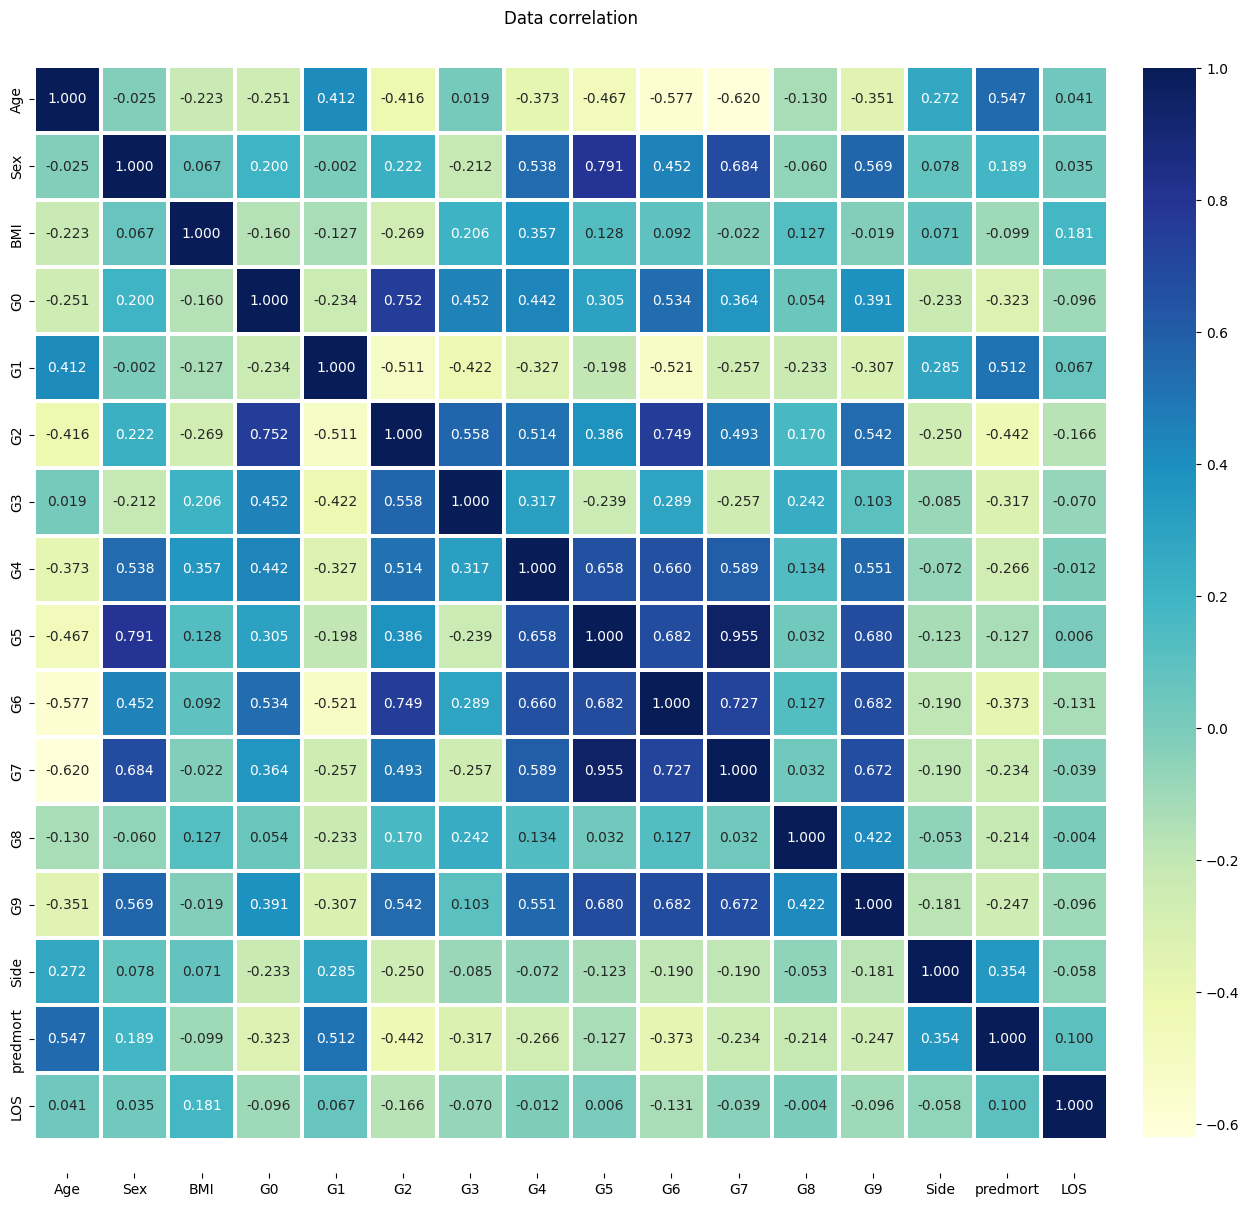

In [441]:
datacor = pd.DataFrame(data=datacor,columns=data.columns,index=data.columns)
plt.figure(figsize=(15,15))
ax = sns.heatmap(datacor,square=True,annot=True,fmt=".3f",linewidths=1.5,cmap="YlGnBu",cbar_kws={"fraction":0.046,"pad":0.03})
ax.set_title("Data correlation")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [442]:
y = data['LOS']
X = data[['Age','Sex','BMI','G0','G1','G2','G3','G4','G5','G6','G7','G8','G9','Side','predmort']]
X = sm.add_constant(X)
reg = sm.OLS(y,X).fit()
print(reg.summary())
x_3 = X2[['Age','Sex','BMI','G0','G1','G2','G3','G4','G5','G6','G7','G8','G9','Side','predmort']]
x_3 = sm.add_constant(x_3)
y_pre = reg.predict(x_3)
r2_score(y,y_pre)

                            OLS Regression Results                            
Dep. Variable:                    LOS   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.165
Date:                Fri, 09 Dec 2022   Prob (F-statistic):              0.304
Time:                        18:11:27   Log-Likelihood:                -603.33
No. Observations:                 186   AIC:                             1239.
Df Residuals:                     170   BIC:                             1290.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5968     17.455     -0.091      0.9

0.09320984603476046

In [251]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

     feature          VIF
0      const  1455.069755
1        Age     9.712438
2        Sex     5.908623
3        BMI     8.703772
4         G0     2.744191
5         G1     2.026434
6         G2    20.013069
7         G3    12.108209
8         G4     3.447292
9         G5    57.166449
10        G6     5.813274
11        G7    80.132815
12        G8     1.745948
13        G9     4.021091
14      Side     1.274592
15  predmort     2.059777


In [443]:
X = data[['G0','G1','G4','G8','G9','Side','predmort']]
y = data[['LOS']]

In [451]:
X = data[['G0','G1','G4','G8','G9','Side','predmort','LOS']]
X_2 = X[['G0','G1','G4','G8','G9','Side','predmort']]
y_2 = X[['LOS']]
X_2

,G0,G1,G4,G8,G9,Side,predmort
0,7.4,39.0,8.0,57.0,1.56,0.0,1.42
1,15.3,29.0,17.0,80.0,2.97,0.0,1.00
2,8.2,47.0,7.0,71.0,1.17,1.0,3.00
3,7.5,24.0,7.0,80.0,1.70,0.0,2.00
4,6.5,32.0,8.0,63.0,1.65,0.0,1.00
...,...,...,...,...,...,...,...
243,9.5,32.0,8.0,65.0,1.75,0.0,3.00
244,7.1,23.0,13.0,71.0,3.07,0.0,1.00
246,12.2,36.0,7.0,66.0,3.03,0.0,0.50
247,19.8,30.0,15.0,82.0,2.69,0.0,1.00


In [452]:
loo = LeaveOneOut()
lg = LinearRegression()
y = np.array(y_2)
X1 = np.array(X_2)
pred = []
y_true = []
for train_index, test_index in loo.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lg.fit(X_train,y_train)
    predict_data = lg.predict(X_test)
    pred.append(predict_data)
    y_true.append(y_test)

In [454]:
pred = np.array(pred).reshape(-1)
y_true = np.array(y_true).reshape(-1)
pred

array([ 9.80948665,  8.86889059,  8.92741963,  9.74117146,  9.28377553,
        9.62790652,  6.78158939,  7.04731747, 10.14598272,  8.40538735,
        9.59701491,  7.60544321, 10.32688651,  7.88729901,  7.92211925,
       11.98976562,  9.73667491,  8.55223602,  7.77674924,  8.72329475,
        7.66077988,  8.445879  ,  8.40590554,  8.61107694,  6.17083558,
        6.72975377,  6.45173998,  8.54324709,  6.03729733,  9.3455742 ,
        9.13462914,  6.9709132 ,  6.33044563,  9.35231353,  4.30269111,
       10.70949041, 11.16535485,  7.34458027,  7.96460692,  8.95925117,
        8.85944072,  6.34452994, 10.45200616, 10.08249949,  9.83807583,
        9.88095114, 10.45665627,  6.30781377,  6.38571396,  8.24029076,
        8.19722607,  8.68354649, 10.60139333, 10.08037426,  7.27747872,
        9.58922986,  8.61160149,  9.37849972,  8.53254153,  8.0905732 ,
        7.43348955,  8.11750971, 10.12150103,  9.41444384,  8.0036092 ,
        8.87598201,  8.29279894,  7.05686066,  8.91423655,  9.46

In [449]:
y_true

array([ 1., 13.,  8.,  4.,  8.,  5., 14.,  3.,  6.,  3., 10.,  7.,  3.,
        2.,  3.,  4.,  8.,  7.,  3.,  6.,  2., 13., 22.,  6.,  6., 12.,
        4.,  4.,  3., 14.,  5.,  7.,  6.,  4.,  3.,  2., 18.,  8.,  7.,
        2., 34.,  9., 23.,  9.,  6.,  8.,  6.,  5.,  5.,  6.,  3.,  2.,
        6., 11.,  9.,  4.,  7., 19.,  6.,  7., 16.,  8., 30.,  7.,  7.,
        6.,  6.,  3.,  7., 11., 14.,  9.,  3.,  8., 13.,  8.,  4.,  6.,
        3., 41.,  5.,  6.,  8.,  2.,  3.,  5.,  6.,  9.,  7.,  7.,  6.,
        8., 12., 13.,  5.,  7.,  9.,  3.,  8.,  4.,  9., 10.,  3.,  5.,
        5.,  9.,  4.,  9.,  6.,  5.,  5.,  5.,  3.,  9., 15.,  4.,  6.,
       12., 11., 12.,  3.,  4.,  4.,  6.,  4.,  7.,  6., 12.,  9.,  8.,
       12., 14., 14.,  3., 18.,  2., 13.,  6.,  6., 36.,  5.,  4.,  7.,
        8.,  9., 19.,  7.,  5., 10.,  8.,  6.,  7., 15.,  8.,  9., 44.,
       15., 13.,  6.,  7., 18., 13.,  5.,  6.,  7.,  4.,  8., 10.,  8.,
       14.,  6.,  7., 12., 12.,  6.,  9.,  5., 21.,  8., 27., 12

In [455]:
r2_score(y_true,pred)

-0.03109432706101023